Después de haber analizado la información teórica que compilamos en el archivo 'justificacion.md' nos hemos decidido por el siguiente plan de acción: 

Vamos a enfocarnos en analizar un número limitado de empresas (5) para poder realizar un análisis más detallado y obtener resultados más precisos. Estas empresas deberán de ser de las más grandes y con mayor capitalización de mercado para tener una idea más general del mercado. 

Nustro objetivo general será:
Determinar si conviene invertir en el S&P 500 como Índice o invertir en empresas individuales. 

Para ello vamos a comparar la rentabilidad y el riesgo de la inversión en el S&P 500 con las empresas individuales. Esto permitirá identificar cuál de las dos opciones es la más conveniente.

Trás realizar una búsqueda en GOOGLE con la especificación "top 5 companies with the biggest market cap in the S&P 500" obtenemos los siguiente: 

As of March 20, 2023, the following are the 25 largest S&P 500 index constituents by weight:
Apple (AAPL): 7.09%
Microsoft (MSFT): 6.13%
Amazon (AMZN): 2.64%
NVIDIA (NVDA): 1.93%
Alphabet Class A (GOOGL): 1.82%

Obtener datos históricos de precios de cierre para las cinco empresas seleccionadas y para el S&P 500 utilizando la librería yfinance en Python. 

In [2]:
import yfinance as yf

# Definimos una lista con los tickers de las empresas que queremos analizar
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL']

# Descargamos los datos de los precios de cierre ajustados para los últimos 23 años
data = yf.download(tickers, start='2000-01-01', end='2023-03-25')['Adj Close']

[*********************100%***********************]  5 of 5 completed


Con este código, hemos descargado los precios de cierre ajustados de las cinco empresas seleccionadas en el rango de fechas especificado. Podemos entonces calcular los rendimientos diarios de los precios de cierre utilizando los precios de cierre de un día y el día anterior:

In [3]:
# Calculamos los rendimientos diarios de las empresas y del S&P 500
returns = data.pct_change().dropna()
sp500 = yf.download('^GSPC', start='2000-01-01', end='2023-03-25')['Adj Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


Con esto, hemos calculado los rendimientos diarios de las cinco empresas seleccionadas y del S&P 500, que serán la base para nuestro análisis comparativo de rentabilidad y riesgo. Podemos ahora generar algunas estadísticas básicas de rendimiento y riesgo para cada empresa y para el S&P 500, como la media y la desviación estándar de los rendimientos diarios:

In [4]:
# Calculamos estadísticas de rendimiento y riesgo para las empresas y el S&P 500
mean_returns = returns.mean()
std_returns = returns.std()

mean_sp500 = sp500.mean()
std_sp500 = sp500.std()

Podemos usar estas estadísticas para crear un gráfico de dispersión que nos permita comparar los rendimientos y el riesgo de cada empresa en relación con el S&P 500:

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px

# Creamos un dataframe con los datos de rendimiento y riesgo de cada empresa y del S&P 500
df = pd.DataFrame({'Empresa': tickers + ['S&P 500'],
                   'Rendimiento medio diario': mean_returns.values.tolist() + [mean_sp500],
                   'Volatilidad diaria': std_returns.values.tolist() + [std_sp500]})

# Generamos un gráfico de dispersión para comparar las empresas con el S&P 500 en términos de rendimiento y riesgo
fig = px.scatter(df, x='Volatilidad diaria', y='Rendimiento medio diario', color='Empresa')

# Agregamos una línea que representa el rendimiento y el riesgo del S&P 500
fig.add_shape(type='line', x0=0, y0=mean_sp500, x1=std_sp500*np.sqrt(252), y1=mean_sp500, line=dict(color='black', dash='dash'))

# Agregamos texto para identificar la línea del S&P 500
fig.add_annotation(x=std_sp500*np.sqrt(252), y=mean_sp500, text='S&P 500', showarrow=False, font=dict(size=14))

# Agregamos título y etiquetas de los ejes
fig.update_layout(title='Rendimiento y riesgo de empresas del S&P 500 vs S&P 500',
                  xaxis_title='Volatilidad diaria',
                  yaxis_title='Rendimiento medio diario')

# Mostramos el gráfico
fig.show()

Hagamos lo mismo pero para sólo los últimos 5 años

In [20]:
import yfinance as yf
import pandas as pd
import plotly.express as px

# Definimos una lista con los tickers de las empresas que queremos analizar
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL']

# Descargamos los datos de los precios de cierre ajustados para los últimos 5 años
data = yf.download(tickers, start='2018-01-01', end='2023-03-25')['Adj Close']

# Calculamos los rendimientos diarios de las empresas y del S&P 500
returns = data.pct_change().dropna()
sp500 = yf.download('^GSPC', start='2018-01-01', end='2023-03-25')['Adj Close'].pct_change().dropna()

# Calculamos estadísticas de rendimiento y riesgo para las empresas y el S&P 500
mean_returns = returns.mean()
std_returns = returns.std()
mean_sp500 = sp500.mean()
std_sp500 = sp500.std()

# Creamos un dataframe con los datos de rendimiento y riesgo de cada empresa y del S&P 500
df = pd.DataFrame({'Empresa': tickers + ['S&P 500'],
                   'Rendimiento medio diario': mean_returns.values.tolist() + [mean_sp500],
                   'Volatilidad diaria': std_returns.values.tolist() + [std_sp500]})

# Generamos un gráfico de dispersión para comparar las empresas con el S&P 500 en términos de rendimiento y riesgo
fig = px.scatter(df, x='Volatilidad diaria', y='Rendimiento medio diario', color='Empresa')

# Agregamos una línea que representa el rendimiento y el riesgo del S&P 500
fig.add_shape(type='line', x0=0, y0=mean_sp500, x1=std_sp500*np.sqrt(252), y1=mean_sp500, line=dict(color='gainsboro', dash='dash'))

# Agregamos texto para identificar la línea del S&P 500
fig.add_annotation(x=std_sp500*np.sqrt(252), y=mean_sp500, text='S&P 500', showarrow=False, font=dict(size=14))

# Agregamos título y etiquetas de los ejes
fig.update_layout(title='Rendimiento y riesgo de empresas del S&P 500 vs S&P 500',
                  xaxis_title='Volatilidad diaria',
                  yaxis_title='Rendimiento medio diario')

# Limitamos la gráfica en el eje x hasta 0.05
fig.update_xaxes(range=[0,0.05])

# Mostramos el gráfico
fig.show()


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


Comparativo de rendimiento y volatilidad anual para los últimos 5 años

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# Definimos una lista con los tickers de las empresas que queremos analizar
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'SPY']

# Descargamos los datos de los precios de cierre ajustados para los últimos 5 años
data = yf.download(tickers, start='2018-01-01', end='2023-03-27')['Adj Close']

# Creamos una función para calcular el rendimiento y la volatilidad anual de una serie de precios
def calculate_annual_metrics(prices):
    returns = prices.pct_change().dropna()
    annual_returns = (1 + returns.mean()) ** 252 - 1
    annual_volatility = returns.std() * np.sqrt(252)
    return annual_returns, annual_volatility


# Creamos un diccionario para almacenar los datos de rendimiento y volatilidad de cada empresa y del índice
metrics = {'Empresa': [], 'Año': [], 'Rendimiento anual': [], 'Volatilidad anual': []}

# Calculamos el rendimiento y la volatilidad anual para cada empresa y para el índice en los años 2018, 2019, 2020, 2021, 2022 y 2023
for ticker in tickers:
    prices = data[ticker]
    for year in [2018, 2019, 2020, 2021, 2022, 2022]:
        year_prices = prices[f'{year}-01-01':f'{year}-12-31']
        annual_returns, annual_volatility = calculate_annual_metrics(year_prices)
        metrics['Empresa'].append(ticker)
        metrics['Año'].append(year)
        metrics['Rendimiento anual'].append(annual_returns)
        metrics['Volatilidad anual'].append(annual_volatility)
        
# Agregar al diccionario
metrics['Empresa'].append(ticker)
metrics['Año'].append(year)
metrics['Rendimiento anual'].append(annual_returns)
metrics['Volatilidad anual'].append(annual_volatility)

def calcula_metricas_2023(prices):
    returns = prices.pct_change().dropna()
    n_days = len(prices.loc['2023-01-01':'2023-03-27'].index.unique()) - 1
    annual_returns = (1 + returns.mean()) ** n_days - 1
    annual_volatility = returns.std() * np.sqrt(n_days)
    return annual_returns, annual_volatility

        
# Calcular rendimiento anual y volatilidad para lo que va del 2023:
for ticker in tickers:
    prices = data[ticker]
    year_prices = prices['2023-01-01':'2023-12-31']
    annual_returns, annual_volatility = calcula_metricas_2023(year_prices)
    metrics['Empresa'].append(ticker)
    metrics['Año'].append(2023)
    metrics['Rendimiento anual'].append(annual_returns)
    metrics['Volatilidad anual'].append(annual_volatility)


# Creamos un dataframe con los datos de rendimiento y volatilidad anual para cada empresa y para el índice
df = pd.DataFrame(metrics)

# Ordenamos el dataframe por año
df = df.sort_values(['Año', 'Rendimiento anual'], ascending=[True, False])

# Mostramos la tabla resultante
print(df)

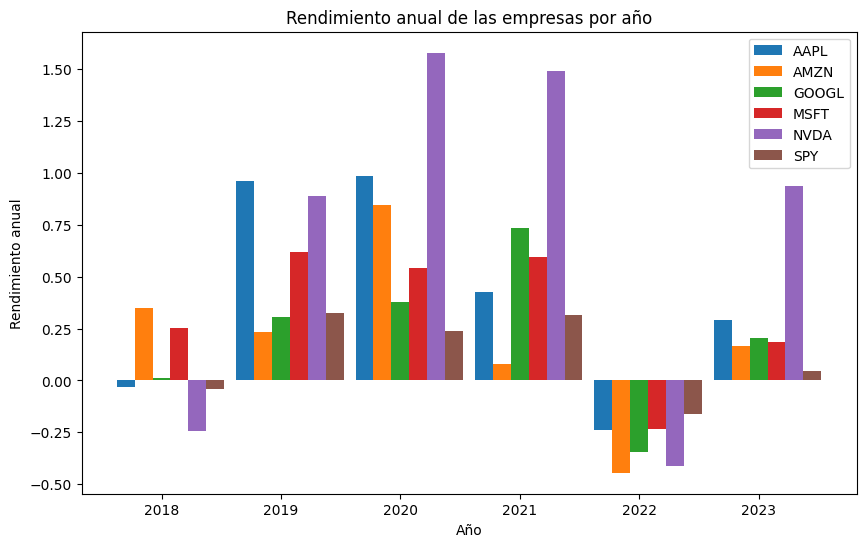

In [32]:
import matplotlib.pyplot as plt

# Agrupamos los datos por empresa y año y calculamos el rendimiento promedio
df_grouped = df.groupby(['Empresa', 'Año']).mean().reset_index()

# Creamos una lista con los años
years = df_grouped['Año'].unique()

# Creamos una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos una barra para cada empresa en cada año
for i, company in enumerate(df_grouped['Empresa'].unique()):
    values = df_grouped[df_grouped['Empresa']==company]['Rendimiento anual']
    ax.bar(years+i*0.15, values, width=0.15, align='center', label=company)

# Agregamos etiquetas y título
ax.set_xticks(years+0.3)
ax.set_xticklabels(years)
ax.set_xlabel('Año')
ax.set_ylabel('Rendimiento anual')
ax.set_title('Rendimiento anual de las empresas por año')

# Agregamos leyenda
ax.legend()

# Mostramos la figura
plt.show()

[*********************100%***********************]  6 of 6 completed


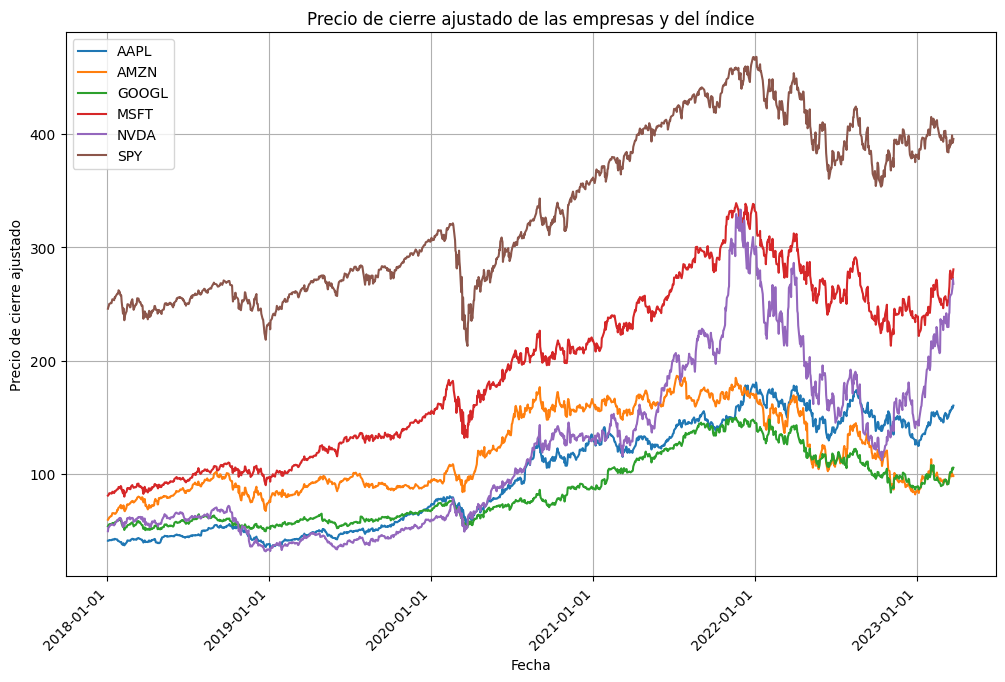

In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Definimos una lista con los tickers de las empresas que queremos analizar
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'SPY']

# Descargamos los datos de los precios de cierre ajustados para los últimos 5 años
data = yf.download(tickers, start='2018-01-01', end='2023-03-25')['Adj Close']

# Graficamos el precio de cierre ajustado de cada empresa y del índice en función del tiempo
ax = data.plot(figsize=(12, 8))
ax.grid(True)

# Formateamos las etiquetas del eje x para que se muestren las fechas de forma legible
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45, ha='right')

plt.title('Precio de cierre ajustado de las empresas y del índice')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.show()